In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import pathlib

In [84]:
method = 'thresholding'
rpi = 'h2r4'
format = 'jpg'
if method == 'ilastik': format = 'bmp'

path_to_processed = sorted(glob.glob('a_processed_images/'+ method + '/' + rpi + '/*.' + format))
path_to_original = sorted(glob.glob('annotated_masks/' + rpi + '/*.jpg'))
names = [pathlib.Path(x).stem for x in path_to_original]

path_to_final_mask = 'a_found_masks/' + method + '/' + rpi + '/'
print(names)

['hive2_rpi4_240422-231601Z', 'hive2_rpi4_240423-133301Z', 'hive2_rpi4_240423-212701Z', 'hive2_rpi4_240423-224701Z', 'hive2_rpi4_240424-014501Z', 'hive2_rpi4_240424-071801Z', 'hive2_rpi4_240424-073601Z', 'hive2_rpi4_240424-080301Z', 'hive2_rpi4_240424-165701Z', 'hive2_rpi4_240425-112701Z', 'hive2_rpi4_240426-055801Z', 'hive2_rpi4_240426-161701Z', 'hive2_rpi4_240426-175601Z', 'hive2_rpi4_240427-004701Z', 'hive2_rpi4_240427-005901Z', 'hive2_rpi4_240427-023201Z', 'hive2_rpi4_240428-111301Z', 'hive2_rpi4_240428-112501Z', 'hive2_rpi4_240428-162801Z', 'hive2_rpi4_240428-171401Z', 'hive2_rpi4_240429-101801Z']


In [85]:
processed_imgs = [cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in path_to_processed]
n = 0
print(processed_imgs[0].shape)
for mask in processed_imgs:
    final_mask = np.ones_like(mask)*255
    if method == 'ilastik':
        mask = cv2.threshold(mask, 1.5, 255, cv2.THRESH_BINARY)[1]
        mask = ~mask
    img_contour = (mask).astype(np.uint8) #convert to uint8 because findContours only accepts uint8
    contours, _ = cv2.findContours(img_contour, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find contours
    contours = [x for x in contours if cv2.contourArea(x) > 120000]
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2] #get the 2 biggest contour
    final_mask = cv2.cvtColor(final_mask, cv2.COLOR_GRAY2BGR) #convert to BGR because drawContours only accepts BGR
    cv2.drawContours(final_mask, contours, -1, (0, 0, 0), -1) #draw the biggest contour
    cv2.drawContours(final_mask, contours, -1, (0, 255, 0), 3) #draw the biggest contour
    for contour in contours:
        M = cv2.moments(contour)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.circle(final_mask, (cX, cY), 10, (0, 0, 255), -1)
        cv2.putText(final_mask, "centroid", (cX, cY - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv2.putText(final_mask, str(cv2.contourArea(contour)), (cX - 100, cY + 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)
    cv2.imwrite(path_to_final_mask + names[n] + '_final_mask.jpg', final_mask)
    n += 1

(1296, 2304)


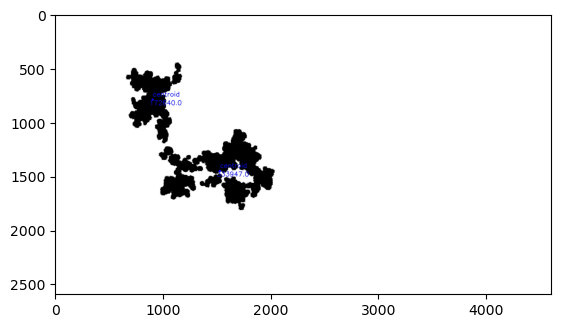

In [36]:
plt.imshow(cv2.imread(path_to_final_mask + names[0] + '_final_mask.jpg'))

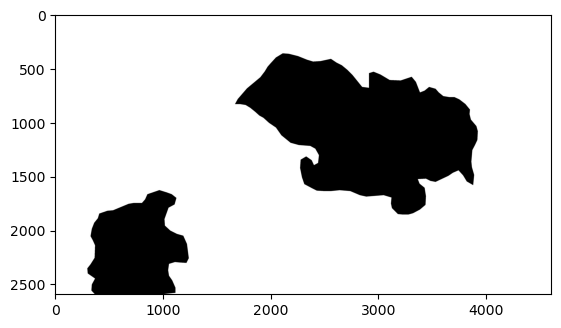

In [19]:
plt.imshow(cv2.imread(path_to_original[0]))

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------

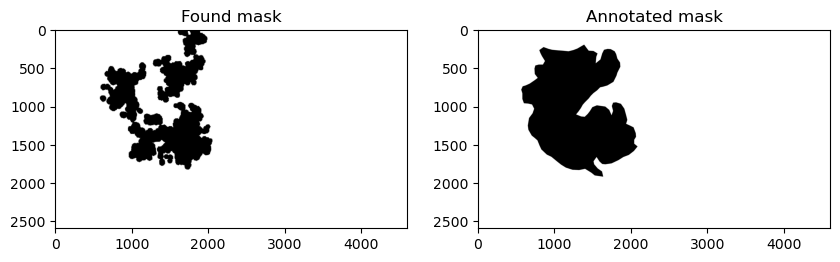

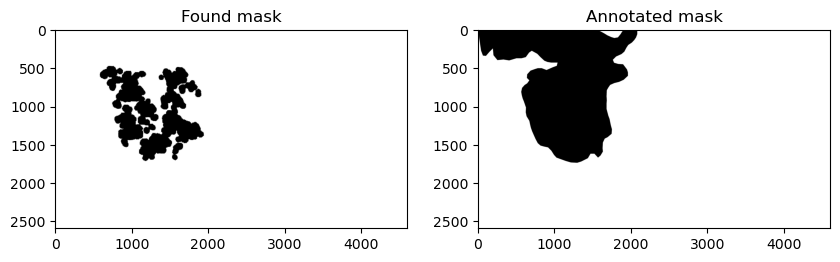

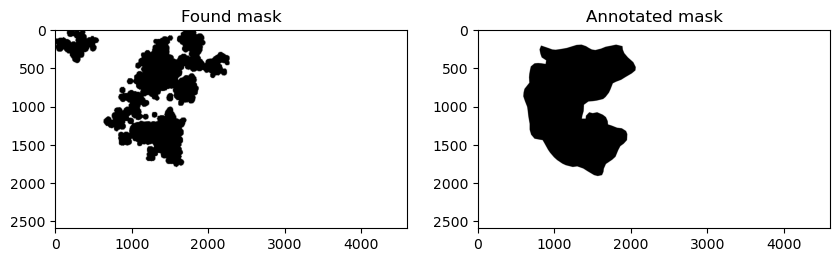

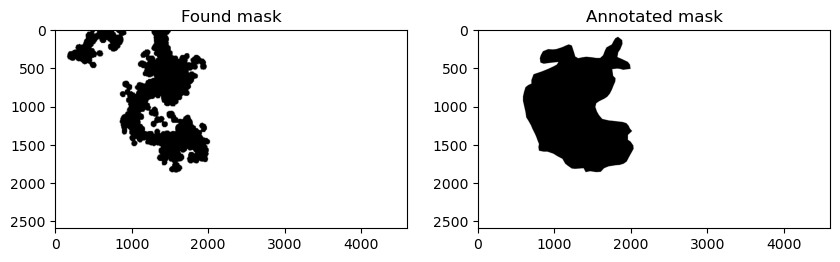

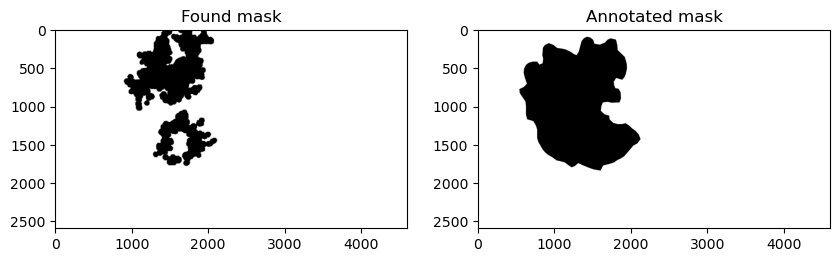

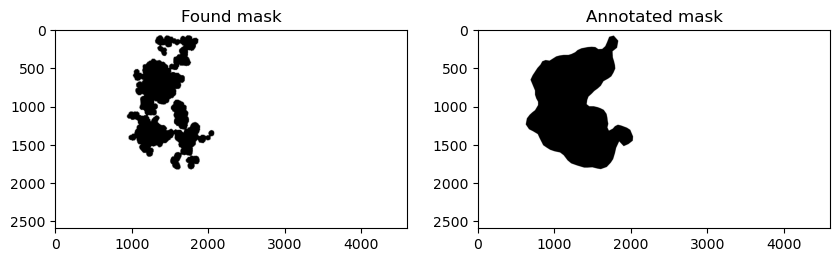

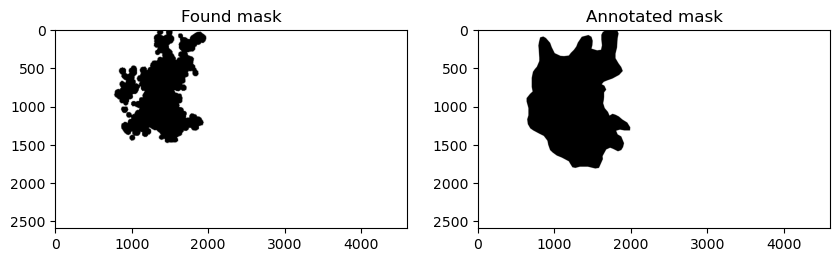

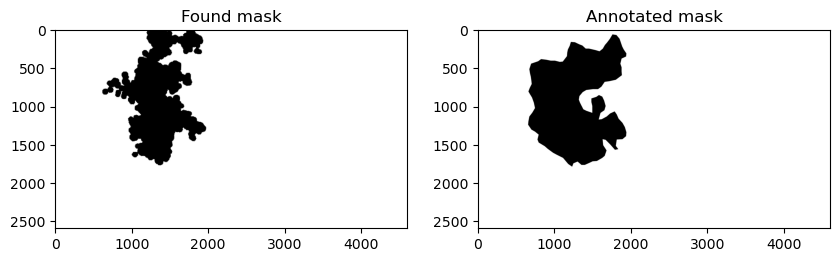

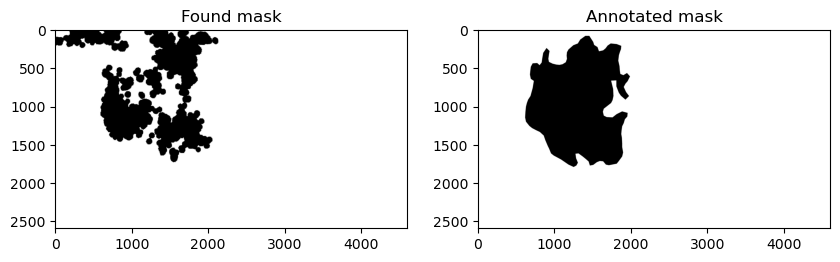

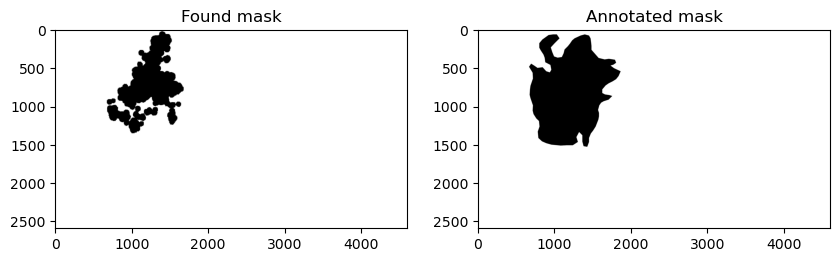

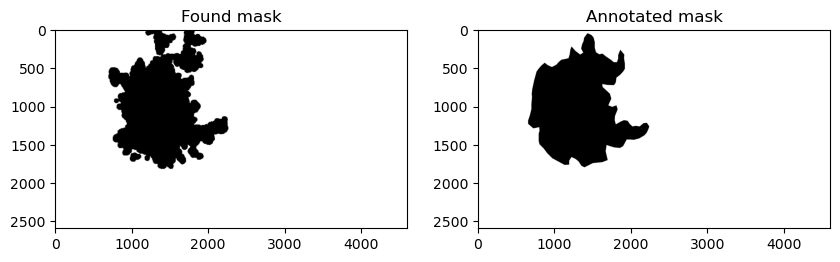

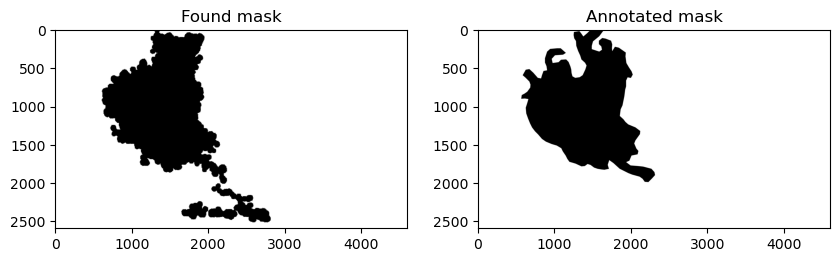

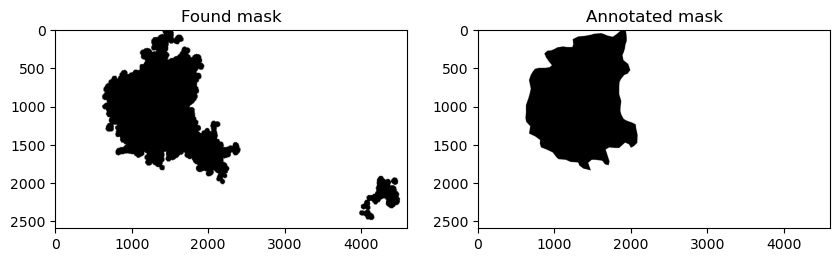

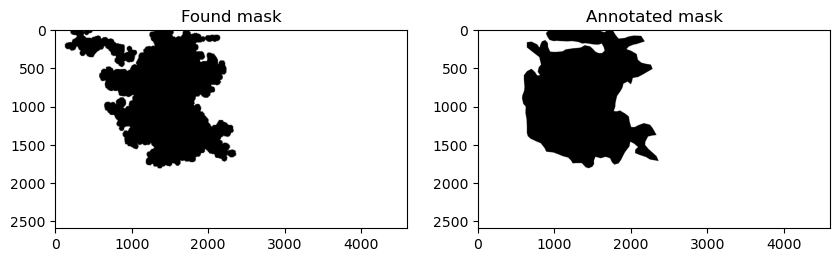

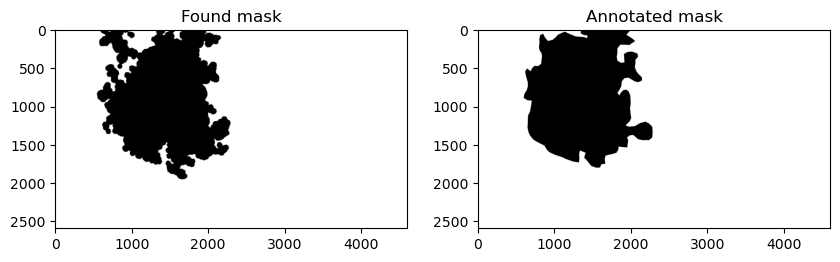

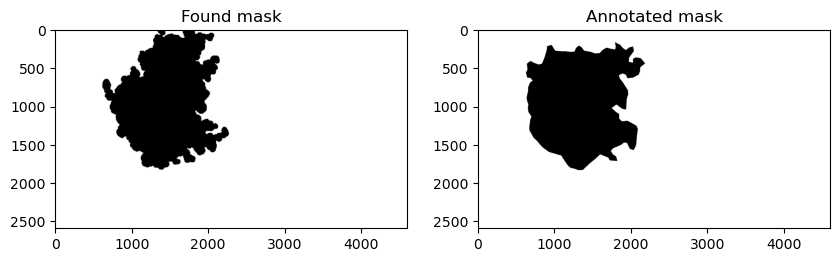

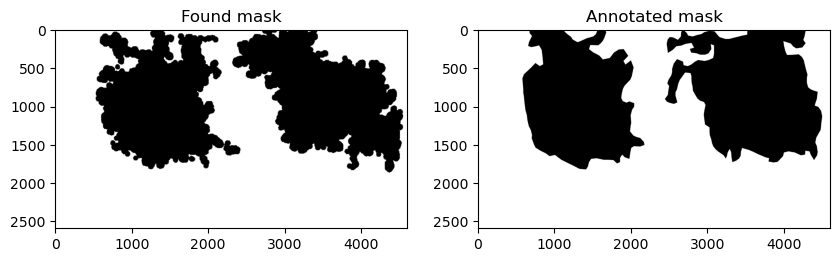

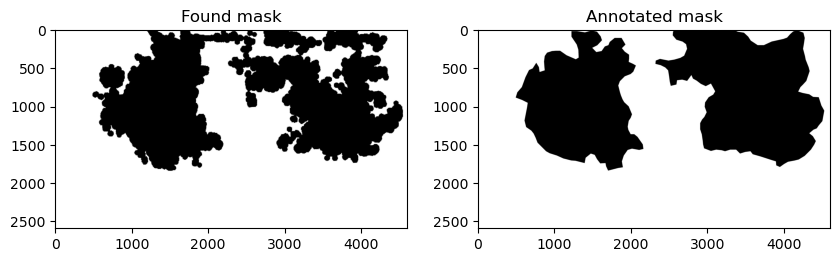

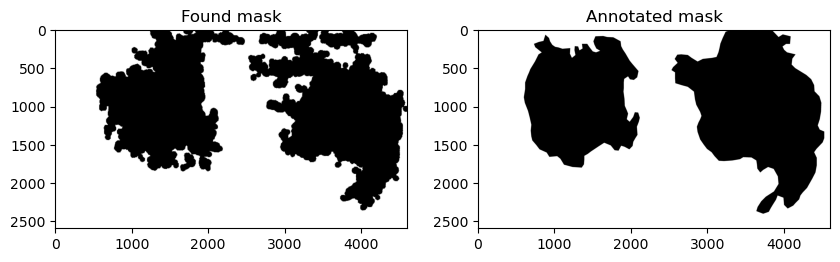

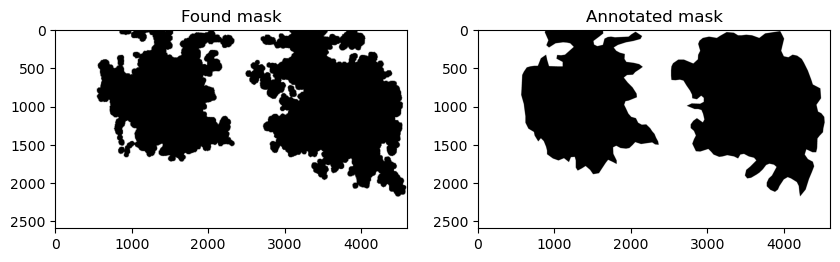

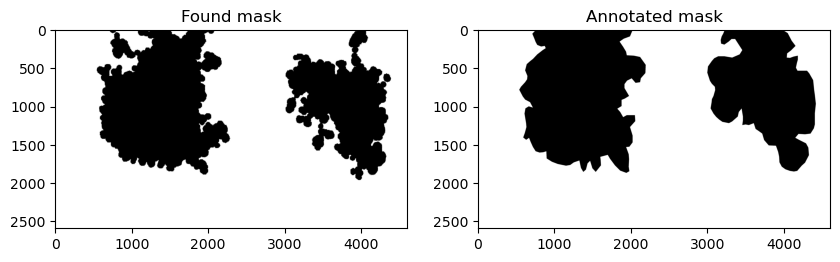

In [105]:
method = 'optical_flow'
rpi = 'h2r4'
format = 'jpg'
if method == 'ilastik': format = 'bmp'

path_to_processed = sorted(glob.glob('a_processed_images/'+ method + '/' + rpi + '/*.' + format))
path_to_original = sorted(glob.glob('annotated_masks/' + rpi + '/*.jpg'))
names = [pathlib.Path(x).stem for x in path_to_original]

path_to_final_mask = 'a_found_masks/' + method + '/' + rpi + '/'
# for all imges, show the found mask and the annotated mask
for i in range(len(names)):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(cv2.imread(path_to_final_mask + names[i] + '_final_mask.jpg'))
    ax[0].set_title('Found mask')
    ax[1].imshow(cv2.imread(path_to_original[i]))
    ax[1].set_title('Annotated mask')
    plt.show()